# IMAGE PREPROCESSING

Starting document pair preprocessing...
Text document: ../temp/splited/doc_masked.jpg
Table document: ../temp/splited/table_only.jpg
Output directory: ../temp/processed
Features:
  - Separate processing pipelines for text and tables
  - Text document optimization for OCR
  - Table document structure preservation
  - Step-by-step processing visualization
  - Organized output with debug files
--------------------------------------------------
=== Processing Document Pair ===
Text document: ../temp/splited/doc_masked.jpg
Table document: ../temp/splited/table_only.jpg
Output directory: ../temp/processed

--- Processing Text Document ---
Preprocessing text document: ../temp/splited/doc_masked.jpg
  Step 1: Converting to grayscale
  Step 2: Applying noise reduction
  Step 3: Enhancing contrast
  Step 4: Applying sharpening
  Step 5: Applying adaptive thresholding
  Step 6: Applying morphological operations
  Text document processing completed: ../temp/processed\text_documents\doc_masked_proc

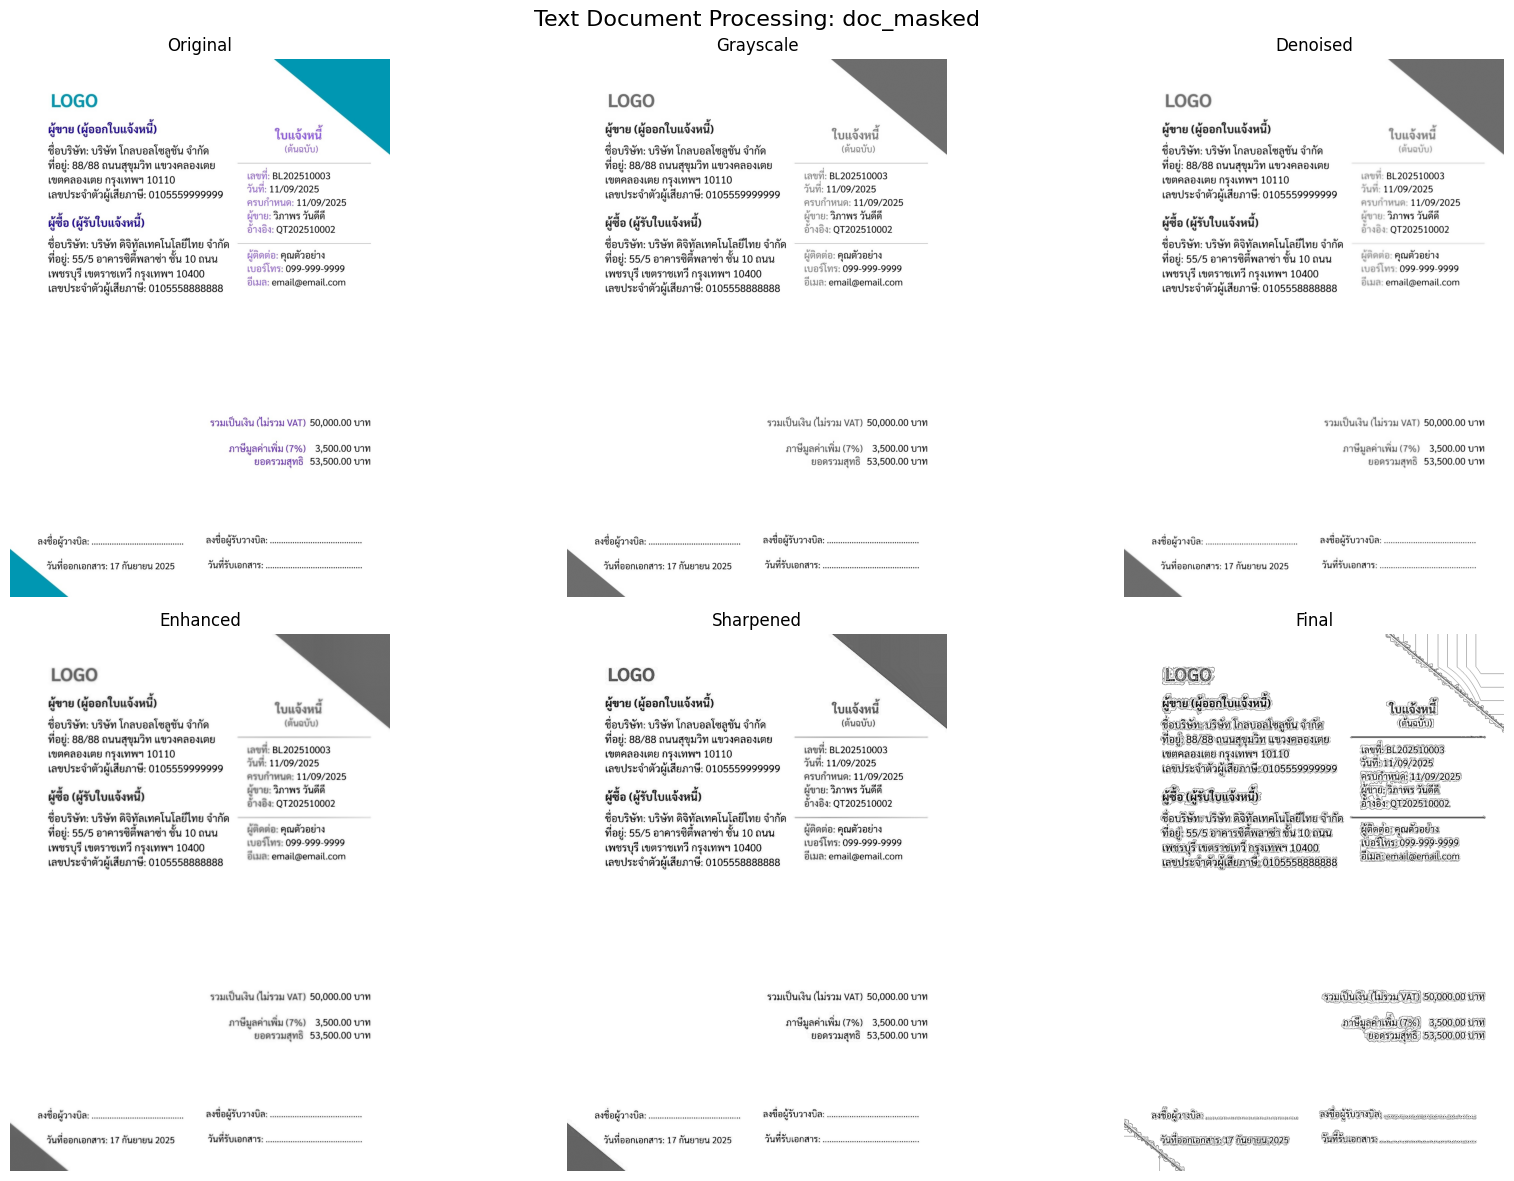


--- Processing Table Document ---
Preprocessing table document: ../temp/splited/table_only.jpg
  Step 1: Converting to grayscale
  Step 2: Applying gentle noise reduction
  Step 3: Enhancing contrast
  Step 4: Enhancing table edges
  Step 5: Applying binary thresholding
  Step 6: Preserving table structure
  Table document processing completed: ../temp/processed\table_documents\table_only_processed.jpg


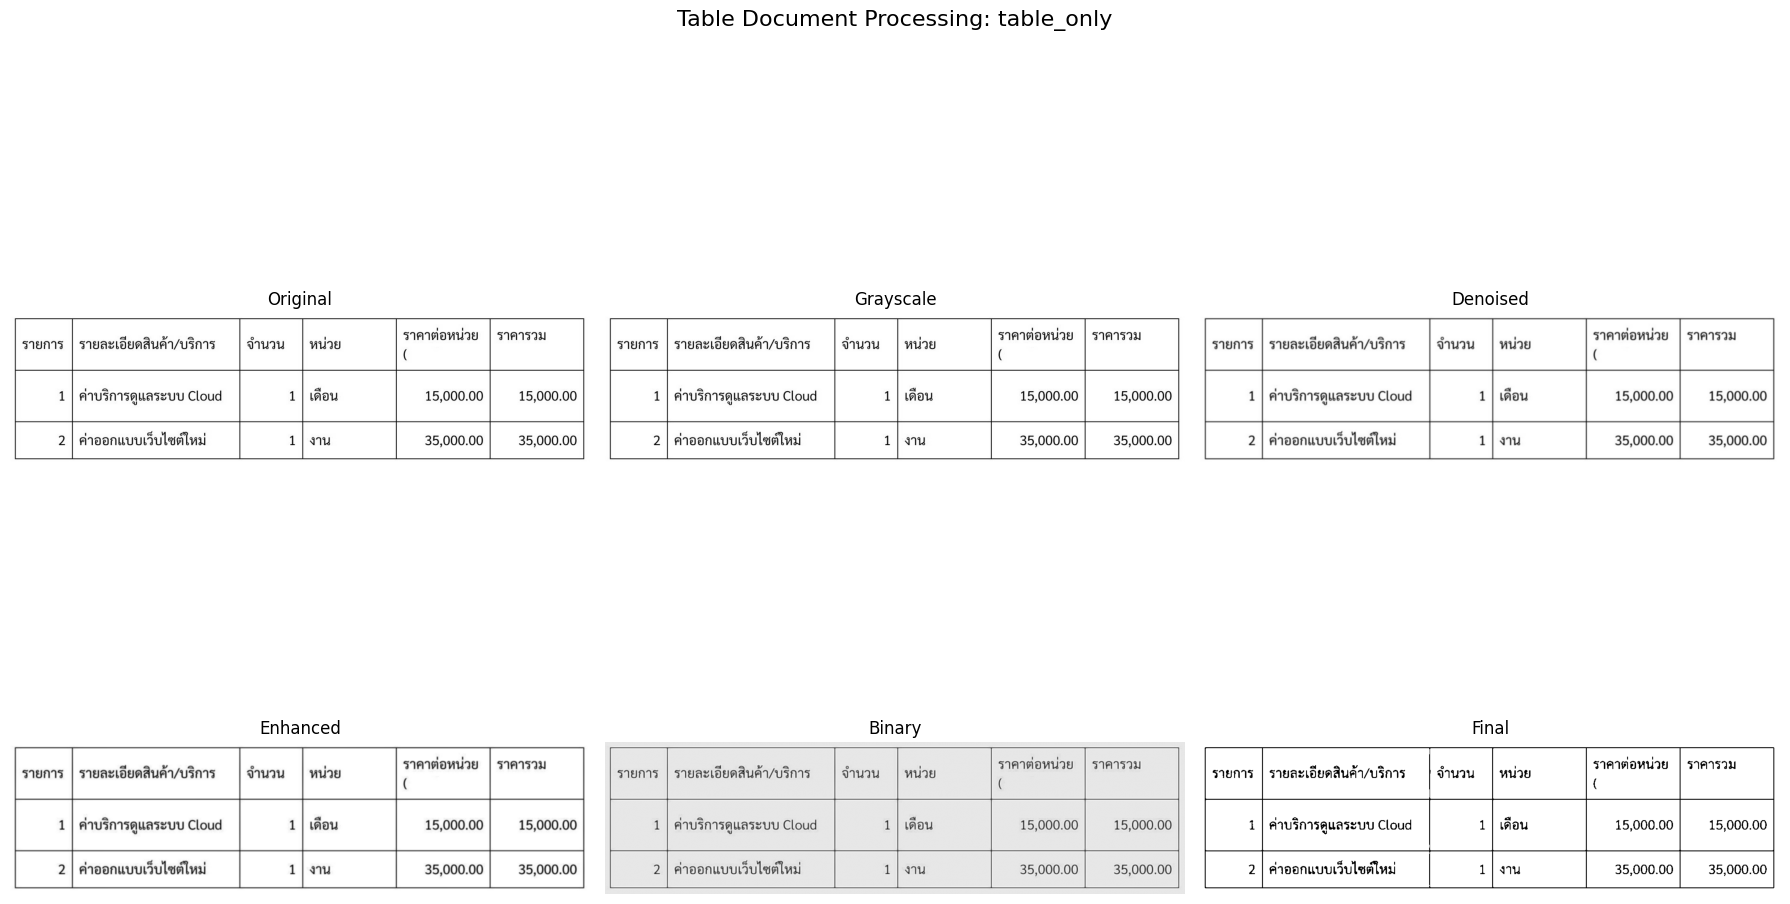


--- Creating Combined Visualization ---
Saved combined visualization: ../temp/processed\debug\doc_combined_processing.jpg


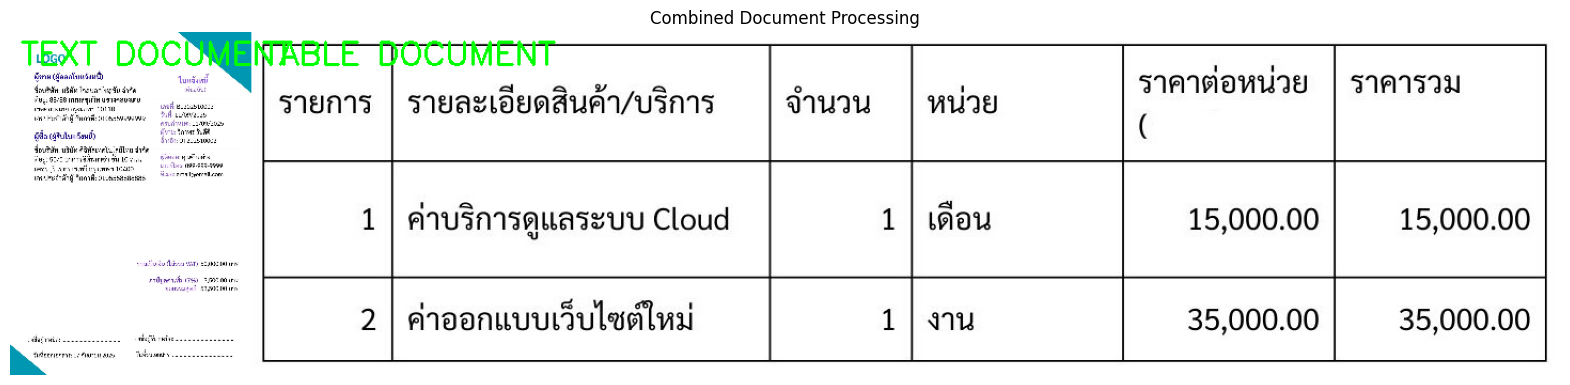


=== Processing Summary ===
Text document: ✓ Success
Table document: ✓ Success
Text output: ../temp/processed\text_documents\doc_masked_processed.jpg
Table output: ../temp/processed\table_documents\table_only_processed.jpg

Preprocessing completed!
Check output directories:
  Text documents: ../temp/processed/text_documents/
  Table documents: ../temp/processed/table_documents/
  Debug files: ../temp/processed/debug/

Processed text document: ../temp/processed\text_documents\doc_masked_processed.jpg
Processed table document: ../temp/processed\table_documents\table_only_processed.jpg


In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Dict, List, Optional, Tuple

class ImagePreprocessor:
    def __init__(self, output_dir='../temp/processed'):
        """
        Initialize Image Preprocessor for document enhancement
        
        Args:
            output_dir (str): Directory for saving processed images
        """
        self.output_dir = output_dir
        
        # Create output directory if it doesn't exist
        Path(self.output_dir).mkdir(parents=True, exist_ok=True)
        
        # Create subdirectories for different types
        Path(os.path.join(self.output_dir, 'text_documents')).mkdir(parents=True, exist_ok=True)
        Path(os.path.join(self.output_dir, 'table_documents')).mkdir(parents=True, exist_ok=True)
        Path(os.path.join(self.output_dir, 'debug')).mkdir(parents=True, exist_ok=True)
    
    def preprocess_text_document(self, image_path: str, save_steps: bool = True) -> Dict:
        """
        Preprocess text document for better OCR recognition
        
        Args:
            image_path (str): Path to input text document image
            save_steps (bool): Whether to save intermediate steps
            
        Returns:
            dict: Processing results and file paths
        """
        try:
            print(f"Preprocessing text document: {image_path}")
            
            # Read image
            original = cv2.imread(image_path)
            if original is None:
                raise ValueError(f"Cannot read image: {image_path}")
            
            base_name = Path(image_path).stem
            results = {
                'original_path': image_path,
                'document_type': 'text',
                'processed_files': {},
                'processing_steps': []
            }
            
            # Step 1: Convert to grayscale
            print("  Step 1: Converting to grayscale")
            gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
            if save_steps:
                gray_path = os.path.join(self.output_dir, 'debug', f"{base_name}_text_01_grayscale.jpg")
                cv2.imwrite(gray_path, gray)
                results['processed_files']['grayscale'] = gray_path
            results['processing_steps'].append('grayscale')
            
            # Step 2: Noise reduction
            print("  Step 2: Applying noise reduction")
            denoised = cv2.medianBlur(gray, 3)
            denoised = cv2.bilateralFilter(denoised, 9, 75, 75)
            if save_steps:
                denoised_path = os.path.join(self.output_dir, 'debug', f"{base_name}_text_02_denoised.jpg")
                cv2.imwrite(denoised_path, denoised)
                results['processed_files']['denoised'] = denoised_path
            results['processing_steps'].append('noise_reduction')
            
            # Step 3: Contrast enhancement
            print("  Step 3: Enhancing contrast")
            # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            enhanced = clahe.apply(denoised)
            if save_steps:
                enhanced_path = os.path.join(self.output_dir, 'debug', f"{base_name}_text_03_enhanced.jpg")
                cv2.imwrite(enhanced_path, enhanced)
                results['processed_files']['enhanced'] = enhanced_path
            results['processing_steps'].append('contrast_enhancement')
            
            # Step 4: Sharpening
            print("  Step 4: Applying sharpening")
            kernel_sharpen = np.array([[-1,-1,-1],
                                     [-1, 9,-1],
                                     [-1,-1,-1]])
            sharpened = cv2.filter2D(enhanced, -1, kernel_sharpen)
            if save_steps:
                sharpened_path = os.path.join(self.output_dir, 'debug', f"{base_name}_text_04_sharpened.jpg")
                cv2.imwrite(sharpened_path, sharpened)
                results['processed_files']['sharpened'] = sharpened_path
            results['processing_steps'].append('sharpening')
            
            # Step 5: Adaptive thresholding
            print("  Step 5: Applying adaptive thresholding")
            # Try multiple thresholding methods
            adaptive_mean = cv2.adaptiveThreshold(sharpened, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
            adaptive_gaussian = cv2.adaptiveThreshold(sharpened, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
            
            if save_steps:
                adaptive_mean_path = os.path.join(self.output_dir, 'debug', f"{base_name}_text_05a_adaptive_mean.jpg")
                adaptive_gaussian_path = os.path.join(self.output_dir, 'debug', f"{base_name}_text_05b_adaptive_gaussian.jpg")
                cv2.imwrite(adaptive_mean_path, adaptive_mean)
                cv2.imwrite(adaptive_gaussian_path, adaptive_gaussian)
                results['processed_files']['adaptive_mean'] = adaptive_mean_path
                results['processed_files']['adaptive_gaussian'] = adaptive_gaussian_path
            results['processing_steps'].append('adaptive_thresholding')
            
            # Step 6: Morphological operations
            print("  Step 6: Applying morphological operations")
            kernel = np.ones((2,2), np.uint8)
            morphed = cv2.morphologyEx(adaptive_gaussian, cv2.MORPH_CLOSE, kernel, iterations=1)
            morphed = cv2.morphologyEx(morphed, cv2.MORPH_OPEN, kernel, iterations=1)
            
            if save_steps:
                morphed_path = os.path.join(self.output_dir, 'debug', f"{base_name}_text_06_morphed.jpg")
                cv2.imwrite(morphed_path, morphed)
                results['processed_files']['morphed'] = morphed_path
            results['processing_steps'].append('morphological_operations')
            
            # Final processed image
            final_path = os.path.join(self.output_dir, 'text_documents', f"{base_name}_processed.jpg")
            cv2.imwrite(final_path, morphed)
            results['processed_files']['final'] = final_path
            
            print(f"  Text document processing completed: {final_path}")
            
            # Display processing steps
            if save_steps:
                self._display_processing_steps(original, [gray, denoised, enhanced, sharpened, adaptive_gaussian, morphed], 
                                             ['Original', 'Grayscale', 'Denoised', 'Enhanced', 'Sharpened', 'Final'], 
                                             f"Text Document Processing: {base_name}")
            
            return results
            
        except Exception as e:
            print(f"Error preprocessing text document: {e}")
            return {'error': str(e), 'processed_files': {}}
    
    def preprocess_table_document(self, image_path: str, save_steps: bool = True) -> Dict:
        """
        Preprocess table document for better structure recognition
        
        Args:
            image_path (str): Path to input table document image
            save_steps (bool): Whether to save intermediate steps
            
        Returns:
            dict: Processing results and file paths
        """
        try:
            print(f"Preprocessing table document: {image_path}")
            
            # Read image
            original = cv2.imread(image_path)
            if original is None:
                raise ValueError(f"Cannot read image: {image_path}")
            
            base_name = Path(image_path).stem
            results = {
                'original_path': image_path,
                'document_type': 'table',
                'processed_files': {},
                'processing_steps': []
            }
            
            # Step 1: Convert to grayscale
            print("  Step 1: Converting to grayscale")
            gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
            if save_steps:
                gray_path = os.path.join(self.output_dir, 'debug', f"{base_name}_table_01_grayscale.jpg")
                cv2.imwrite(gray_path, gray)
                results['processed_files']['grayscale'] = gray_path
            results['processing_steps'].append('grayscale')
            
            # Step 2: Noise reduction (gentler for tables)
            print("  Step 2: Applying gentle noise reduction")
            denoised = cv2.GaussianBlur(gray, (3, 3), 0)
            if save_steps:
                denoised_path = os.path.join(self.output_dir, 'debug', f"{base_name}_table_02_denoised.jpg")
                cv2.imwrite(denoised_path, denoised)
                results['processed_files']['denoised'] = denoised_path
            results['processing_steps'].append('noise_reduction')
            
            # Step 3: Contrast enhancement
            print("  Step 3: Enhancing contrast")
            clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
            enhanced = clahe.apply(denoised)
            if save_steps:
                enhanced_path = os.path.join(self.output_dir, 'debug', f"{base_name}_table_03_enhanced.jpg")
                cv2.imwrite(enhanced_path, enhanced)
                results['processed_files']['enhanced'] = enhanced_path
            results['processing_steps'].append('contrast_enhancement')
            
            # Step 4: Edge enhancement for table lines
            print("  Step 4: Enhancing table edges")
            # Use Sobel operators to enhance edges
            sobel_x = cv2.Sobel(enhanced, cv2.CV_64F, 1, 0, ksize=3)
            sobel_y = cv2.Sobel(enhanced, cv2.CV_64F, 0, 1, ksize=3)
            sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
            sobel_combined = np.uint8(sobel_combined / sobel_combined.max() * 255)
            
            # Combine with original
            edge_enhanced = cv2.addWeighted(enhanced, 0.8, sobel_combined, 0.2, 0)
            
            if save_steps:
                edge_path = os.path.join(self.output_dir, 'debug', f"{base_name}_table_04_edge_enhanced.jpg")
                cv2.imwrite(edge_path, edge_enhanced)
                results['processed_files']['edge_enhanced'] = edge_path
            results['processing_steps'].append('edge_enhancement')
            
            # Step 5: Binary thresholding (preserve table structure)
            print("  Step 5: Applying binary thresholding")
            # Use Otsu's method for automatic threshold
            _, binary_otsu = cv2.threshold(edge_enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            
            # Also try adaptive threshold
            adaptive = cv2.adaptiveThreshold(edge_enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
            
            if save_steps:
                otsu_path = os.path.join(self.output_dir, 'debug', f"{base_name}_table_05a_otsu.jpg")
                adaptive_path = os.path.join(self.output_dir, 'debug', f"{base_name}_table_05b_adaptive.jpg")
                cv2.imwrite(otsu_path, binary_otsu)
                cv2.imwrite(adaptive_path, adaptive)
                results['processed_files']['otsu'] = otsu_path
                results['processed_files']['adaptive'] = adaptive_path
            results['processing_steps'].append('binary_thresholding')
            
            # Step 6: Table structure preservation
            print("  Step 6: Preserving table structure")
            # Detect and enhance table lines
            horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
            vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))
            
            horizontal_lines = cv2.morphologyEx(binary_otsu, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
            vertical_lines = cv2.morphologyEx(binary_otsu, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
            
            # Combine table structure
            table_structure = cv2.addWeighted(horizontal_lines, 0.5, vertical_lines, 0.5, 0.0)
            
            # Combine with text content
            final_table = cv2.bitwise_or(adaptive, table_structure)
            
            if save_steps:
                h_lines_path = os.path.join(self.output_dir, 'debug', f"{base_name}_table_06a_horizontal_lines.jpg")
                v_lines_path = os.path.join(self.output_dir, 'debug', f"{base_name}_table_06b_vertical_lines.jpg")
                structure_path = os.path.join(self.output_dir, 'debug', f"{base_name}_table_06c_table_structure.jpg")
                cv2.imwrite(h_lines_path, horizontal_lines)
                cv2.imwrite(v_lines_path, vertical_lines)
                cv2.imwrite(structure_path, table_structure)
                results['processed_files']['horizontal_lines'] = h_lines_path
                results['processed_files']['vertical_lines'] = v_lines_path
                results['processed_files']['table_structure'] = structure_path
            results['processing_steps'].append('table_structure_preservation')
            
            # Final processed image
            final_path = os.path.join(self.output_dir, 'table_documents', f"{base_name}_processed.jpg")
            cv2.imwrite(final_path, final_table)
            results['processed_files']['final'] = final_path
            
            print(f"  Table document processing completed: {final_path}")
            
            # Display processing steps
            if save_steps:
                self._display_processing_steps(original, [gray, denoised, enhanced, edge_enhanced, binary_otsu, final_table], 
                                             ['Original', 'Grayscale', 'Denoised', 'Enhanced', 'Binary', 'Final'], 
                                             f"Table Document Processing: {base_name}")
            
            return results
            
        except Exception as e:
            print(f"Error preprocessing table document: {e}")
            return {'error': str(e), 'processed_files': {}}
    
    def _display_processing_steps(self, original, processed_images, titles, main_title):
        """
        Display processing steps in a grid
        
        Args:
            original: Original image
            processed_images: List of processed images
            titles: List of titles for each image
            main_title: Main title for the plot
        """
        try:
            fig, axes = plt.subplots(2, 3, figsize=(18, 12))
            fig.suptitle(main_title, fontsize=16)
            
            # Flatten axes for easier indexing
            axes = axes.flatten()
            
            # Show original
            axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
            axes[0].set_title(titles[0])
            axes[0].axis('off')
            
            # Show processed images
            for i, (img, title) in enumerate(zip(processed_images, titles[1:]), 1):
                if len(img.shape) == 3:
                    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                else:
                    axes[i].imshow(img, cmap='gray')
                axes[i].set_title(title)
                axes[i].axis('off')
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error displaying processing steps: {e}")
    
    def process_document_pair(self, text_document_path: str, table_document_path: str, save_steps: bool = True) -> Dict:
        """
        Process both text and table documents
        
        Args:
            text_document_path (str): Path to text document image
            table_document_path (str): Path to table document image
            save_steps (bool): Whether to save intermediate steps
            
        Returns:
            dict: Processing results for both documents
        """
        print(f"=== Processing Document Pair ===")
        print(f"Text document: {text_document_path}")
        print(f"Table document: {table_document_path}")
        print(f"Output directory: {self.output_dir}")
        
        results = {
            'text_document': {},
            'table_document': {},
            'summary': {},
            'output_directory': self.output_dir
        }
        
        # Process text document
        print(f"\n--- Processing Text Document ---")
        if os.path.exists(text_document_path):
            results['text_document'] = self.preprocess_text_document(text_document_path, save_steps)
        else:
            print(f"Text document not found: {text_document_path}")
            results['text_document'] = {'error': f'File not found: {text_document_path}'}
        
        # Process table document
        print(f"\n--- Processing Table Document ---")
        if os.path.exists(table_document_path):
            results['table_document'] = self.preprocess_table_document(table_document_path, save_steps)
        else:
            print(f"Table document not found: {table_document_path}")
            results['table_document'] = {'error': f'File not found: {table_document_path}'}
        
        # Create combined visualization
        print(f"\n--- Creating Combined Visualization ---")
        if ('error' not in results['text_document'] and 'error' not in results['table_document']):
            base_name = Path(text_document_path).stem.replace('_masked', '')
            combined_viz_path = os.path.join(self.output_dir, 'debug', f"{base_name}_combined_processing.jpg")
            self._create_combined_visualization(text_document_path, table_document_path, combined_viz_path)
            results['combined_visualization_path'] = combined_viz_path
        
        # Generate summary
        results['summary'] = {
            'text_success': 'error' not in results['text_document'],
            'table_success': 'error' not in results['table_document'],
            'text_final_path': results['text_document'].get('processed_files', {}).get('final', ''),
            'table_final_path': results['table_document'].get('processed_files', {}).get('final', ''),
            'output_directory': self.output_dir
        }
        
        print(f"\n=== Processing Summary ===")
        print(f"Text document: {'✓ Success' if results['summary']['text_success'] else '✗ Failed'}")
        print(f"Table document: {'✓ Success' if results['summary']['table_success'] else '✗ Failed'}")
        if results['summary']['text_final_path']:
            print(f"Text output: {results['summary']['text_final_path']}")
        if results['summary']['table_final_path']:
            print(f"Table output: {results['summary']['table_final_path']}")
        
        return results
    
    def _create_combined_visualization(self, text_path, table_path, save_path):
        """
        Create combined visualization showing both original documents
        
        Args:
            text_path: Path to text document
            table_path: Path to table document
            save_path: Path to save combined visualization
        """
        try:
            # Read both images
            text_img = cv2.imread(text_path)
            table_img = cv2.imread(table_path)
            
            if text_img is None or table_img is None:
                print("Could not read one or both images for combined visualization")
                return
            
            # Resize images to same height
            height = min(text_img.shape[0], table_img.shape[0])
            text_img_resized = cv2.resize(text_img, (int(text_img.shape[1] * height / text_img.shape[0]), height))
            table_img_resized = cv2.resize(table_img, (int(table_img.shape[1] * height / table_img.shape[0]), height))
            
            # Combine horizontally
            combined_img = np.hstack([text_img_resized, table_img_resized])
            
            # Add labels
            cv2.putText(combined_img, "TEXT DOCUMENT", (10, 30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.putText(combined_img, "TABLE DOCUMENT", (text_img_resized.shape[1] + 10, 30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
            # Save combined image
            cv2.imwrite(save_path, combined_img)
            print(f"Saved combined visualization: {save_path}")
            
            # Display combined result
            plt.figure(figsize=(20, 10))
            plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
            plt.title("Combined Document Processing")
            plt.axis('off')
            plt.show()
            
        except Exception as e:
            print(f"Error creating combined visualization: {e}")


# Main function for easy usage
def preprocess_document_pair(text_document_path: str, table_document_path: str, 
                           output_dir: str = '../temp/processed', save_steps: bool = True) -> Dict:
    """
    Main function to preprocess a pair of documents (text and table)
    
    Args:
        text_document_path (str): Path to text document image
        table_document_path (str): Path to table document image
        output_dir (str): Output directory for processed images
        save_steps (bool): Whether to save intermediate processing steps
        
    Returns:
        dict: Processing results
    """
    print("Starting document pair preprocessing...")
    print(f"Text document: {text_document_path}")
    print(f"Table document: {table_document_path}")
    print(f"Output directory: {output_dir}")
    print("Features:")
    print("  - Separate processing pipelines for text and tables")
    print("  - Text document optimization for OCR")
    print("  - Table document structure preservation")
    print("  - Step-by-step processing visualization")
    print("  - Organized output with debug files")
    print("-" * 50)
    
    # Create preprocessor
    preprocessor = ImagePreprocessor(output_dir)
    
    # Process document pair
    results = preprocessor.process_document_pair(text_document_path, table_document_path, save_steps)
    
    return results


# Usage example
if __name__ == "__main__":
    # Example usage with specific file paths
    text_doc_path = "../temp/splited/doc_masked.jpg"
    table_doc_path = "../temp/splited/table_only.jpg"
    output_directory = "../temp/processed"
    
    # Process document pair
    results = preprocess_document_pair(
        text_document_path=text_doc_path,
        table_document_path=table_doc_path,
        output_dir=output_directory,
        save_steps=True
    )
    
    # Display results
    if results['summary']['text_success'] or results['summary']['table_success']:
        print(f"\nPreprocessing completed!")
        print(f"Check output directories:")
        print(f"  Text documents: {output_directory}/text_documents/")
        print(f"  Table documents: {output_directory}/table_documents/")
        print(f"  Debug files: {output_directory}/debug/")
        
        # Show final file paths
        if results['summary']['text_final_path']:
            print(f"\nProcessed text document: {results['summary']['text_final_path']}")
        if results['summary']['table_final_path']:
            print(f"Processed table document: {results['summary']['table_final_path']}")
    else:
        print(f"Processing failed for both documents")
        if 'error' in results['text_document']:
            print(f"Text document error: {results['text_document']['error']}")
        if 'error' in results['table_document']:
            print(f"Table document error: {results['table_document']['error']}")
        print("Please check:")
        print("1. Input files exist and are readable")
        print("2. Output directory is writable")
        print("3. Dependencies: pip install opencv-python matplotlib")